In [1]:
import re #remove special charectors
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/twitter_validation.csv',header=None)
df.columns=['id','location','target','text']
df

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
df.isna()
missing_count = df.isna().sum()
print(missing_count)


id          0
location    0
target      0
text        0
dtype: int64


In [5]:
# Calculate the number of occurrences of each term in the 'location' column (case-insensitive)
facebook_count = df['location'].str.contains('facebook', case=False).sum()
microsoft_count = df['location'].str.contains('microsoft', case=False).sum()
amazon_count = df['location'].str.contains('amazon', case=False).sum()
google_count = df['location'].str.contains('google', case=False).sum()

print(f"Facebook: {facebook_count}")
print(f"Microsoft: {microsoft_count}")
print(f"Amazon: {amazon_count}")
print(f"Google: {google_count}")

Facebook: 33
Microsoft: 28
Amazon: 34
Google: 24


<ipython-input-4-9dcd8e4f67fb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Term', y='Count', data=term_counts_df, palette='viridis')


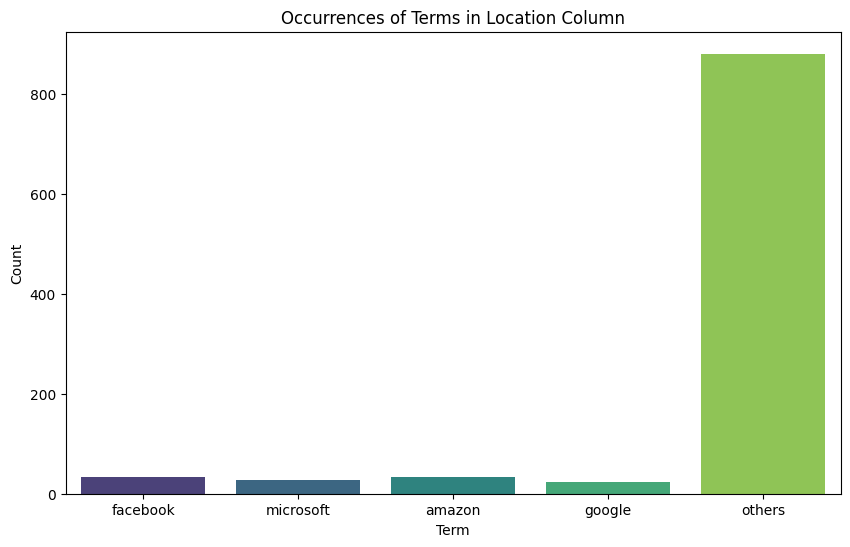

In [4]:
# Terms to count
terms = ["facebook", "microsoft", "amazon", "google"]

# Count occurrences
term_counts = {term: df['location'].str.contains(term, case=False).sum() for term in terms}
term_counts['others'] = len(df) - sum(term_counts.values())

# Convert to DataFrame for plotting
term_counts_df = pd.DataFrame(list(term_counts.items()), columns=['Term', 'Count'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Term', y='Count', data=term_counts_df, palette='viridis')
plt.title('Occurrences of Terms in Location Column')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()


target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64


<ipython-input-6-4a7086cbb8f9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=target_counts_df, palette='viridis')


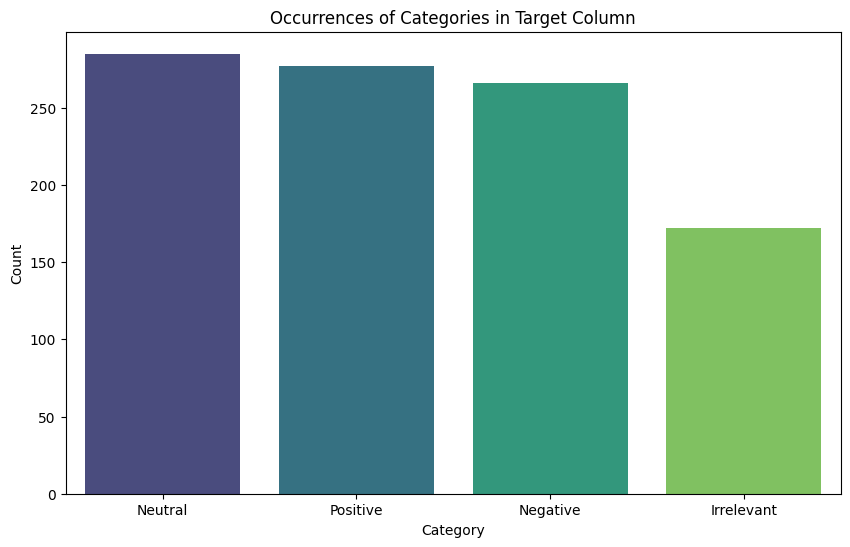

In [6]:
# Count occurrences in 'target' column
target_counts = df['target'].value_counts()
print(target_counts)

# Convert to DataFrame for plotting
target_counts_df = target_counts.reset_index()
target_counts_df.columns = ['Category', 'Count']

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=target_counts_df, palette='viridis')
plt.title('Occurrences of Categories in Target Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [7]:
#drop irrelevrnt from target column
df['target'].value_counts()


,count
target,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


In [8]:
df.drop(df.index[(df["target"]=='Irrelevant')],axis=0,inplace=True)
df

,id,location,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
df.reset_index(drop=True,inplace=True)
df

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
#drop id and location column
df.drop(['id','location'],axis=1,inplace=True)


In [11]:
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
tweets=df.text
tweets

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so it’s time to drink wine n play...
826,Bought a fraction of Microsoft today. Small wins.


In [15]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi @EAHelp I ’ ve had Madeleine McCann in my c...
...,...
823,Please explain how this is possible ! How can ...
824,Good on Sony . As much as I want to see the ne...
825,Today sucked so it ’ s time to drink wine n pl...
826,Bought a fraction of Microsoft today . Small w...


In [18]:
#remove special charcter
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi @EAHelp I ’ ve had Madeleine McCann in my c...
...,...
823,Please explain how this is possible ! How can ...
824,Good on Sony . As much as I want to see the ne...
825,Today sucked so it ’ s time to drink wine n pl...
826,Bought a fraction of Microsoft today . Small w...


In [19]:
#stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

,text
0,bbc news - amazon boss jeff bezo reject claim ...
1,@microsoft whi do i pay for word when it funct...
2,"csgo matchmak is so full of closet hack , it a..."
3,now the presid is slap american in the face th...
4,hi @eahelp i ’ ve had madelein mccann in my ce...
...,...
823,pleas explain how this is possibl ! how can th...
824,good on soni . as much as i want to see the ne...
825,today suck so it ’ s time to drink wine n play...
826,bought a fraction of microsoft today . small w...


In [20]:
#remove stopword
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x)if i not in sw]).apply(lambda x:" ".join(x))
tweets

,text
0,bbc news - amazon boss jeff bezo reject claim ...
1,@microsoft whi pay word function poor @samsung...
2,"csgo matchmak full closet hack , truli aw game ."
3,presid slap american face realli commit unlaw ...
4,hi @eahelp ’ madelein mccann cellar past 13 ye...
...,...
823,pleas explain possibl ! let compani overcharg ...
824,"good soni . much want see new ps5 , go right m..."
825,today suck ’ time drink wine n play borderland...
826,bought fraction microsoft today . small win .


In [21]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)
train_data

<828x3937 sparse matrix of type '<class 'numpy.float64'>'
	with 10951 stored elements in Compressed Sparse Row format>

In [22]:
train_data.shape

(828, 3937)